In [1]:
#Import the necessities
import pandas as pd
from pandas import Series, DataFrame

In [2]:
#retrieve information
titanic_df = pd.read_csv('train.csv')

In [3]:
#Check document
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Missing a lot of information in the "Cabin" column.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Some Basic Questions
#1: Who were the passengers on the Titanic? (Ages, Gender, Class, ...etc)
#2: What deck were the passengers on and how does that relate to their class?
#3: Where did the passengers come from?
#4: Who was alone and who was with family?

#Digging Deeper

#5: What factors helped someone survive the sinking?

In [6]:
#Analysis & Visualization modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

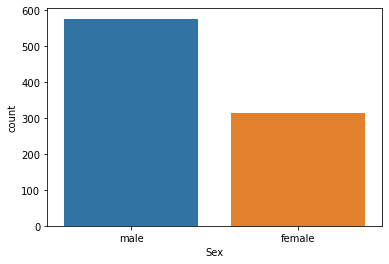

In [7]:
#Checking gender first.
#Factorplot has been replaced with catplot
#But I really wanted a countplot
#Almost twice as many male passengers as female.
sns.countplot('Sex',data=titanic_df,hue_order='Pclass')

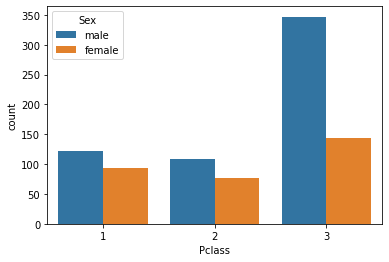

In [8]:
#Countplot
#Far more males in the 3rd class.
sns.countplot('Pclass', data=titanic_df,hue='Sex')

In [9]:
#Might be interesting to know split between males, females, and children.
#Will use apply technique to create a function

def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [10]:
#Creating a new column titled "person"
#Taking information from titanic_df attributes Age & Sex and appling the function created
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [11]:
#Quick view of 10 rows of dataframe
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


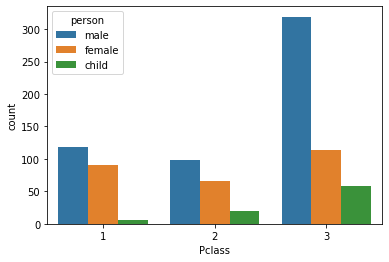

In [12]:
#Seems to be a high number of children in 3rd class
sns.countplot('Pclass',data=titanic_df,hue='person')

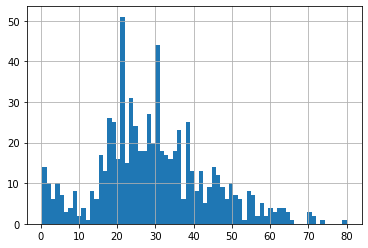

In [13]:
#Histogram
#Distribution of age range with 70 bins.
titanic_df['Age'].hist(bins=70)

In [14]:
#Finding mean age
titanic_df['Age'].mean()

29.69911764705882

In [15]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

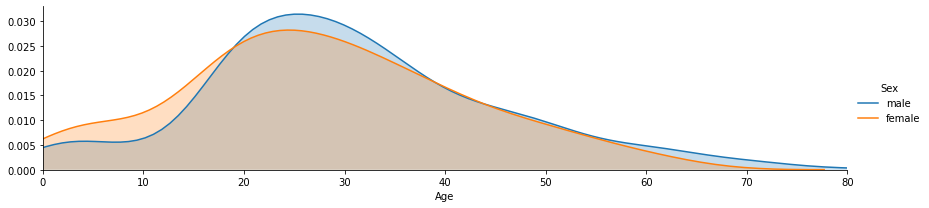

In [16]:
#Using a facet grid with Seaborn,
#which allows us to do multiple plots on one figure
#.map to plot all possible kde plots for age columns by hue choice
fig = sns.FacetGrid(titanic_df, hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

#set x max limit by oldest passenger

oldest = titanic_df['Age'].max()

#No one can be negative years old.

fig.set(xlim=(0,oldest))

#Manually add lenged

fig.add_legend()


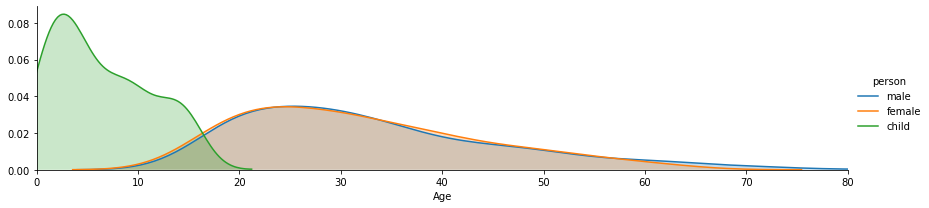

In [17]:
#Making a KDE Plot with Children added.
#Copy & Paste - with hue change to Person

fig = sns.FacetGrid(titanic_df, hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

#KDE plot is subject to bandwidth, which is why it goes past the 16 mark.

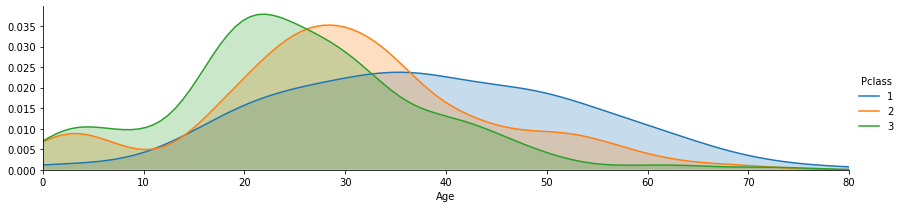

In [18]:
#Class visualization
#Changed hue to "Pclass"

fig = sns.FacetGrid(titanic_df, hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [19]:
#This gave us a good picture of who the passengers were, based on sex, age, and class.
#Next we're going to move onto 2nd Question: What deck were the passengers on
#And how does that relate to their class?

In [20]:
#Grab a preview of first 5 rows again.
#Lots of null values in Cabin. We should drop that.

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [21]:
#Dropping Cabin NA values
deck = titanic_df['Cabin'].dropna()

In [22]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

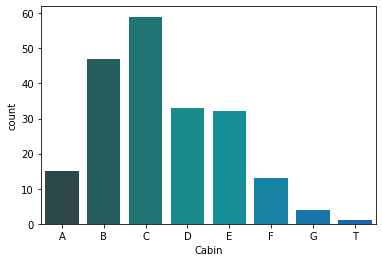

In [23]:
#Grabbing first letter of deck, using a for loop
levels = []

for level in deck:
    levels.append(level[0])
    

#Sort alphabetically    
levels.sort()

#Creating a new dataframe for cabin information and creating a countplot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin',data=cabin_df,palette='winter_d')

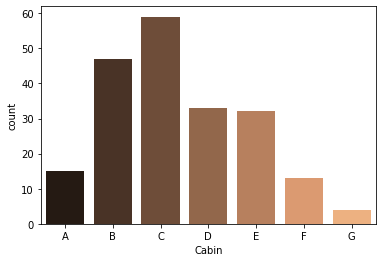

In [24]:
#Drop T value by redefining cabin values excluding T
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Creating a different looking graph
sns.countplot('Cabin',data=cabin_df,palette='copper')

In [25]:
#Look at original data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


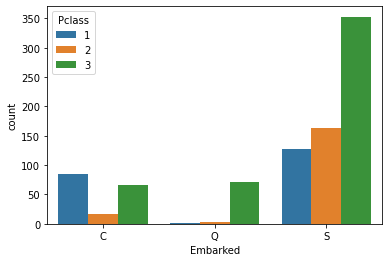

In [26]:
#Embarked column has values of C, Q, & S.
#Ports of Embarktion C = Cherrbourg, Q = Queenstown, S = South Hampton
#Seaborn - x_order has been changed to order 7/22/2020

sns.countplot('Embarked', data=titanic_df,hue='Pclass', order=['C','Q','S'])

#Almost everybody in Queenstown was Third class

In [27]:
#Next question: Who was alone? Who was with family?
#Need to define what 'alone' means
#Need to check dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [28]:
#SibSP: 1 is True 0 is False, whether they had siblings
#Parch 1 is True 0 is Fales whether they had parents or children onboard.
#Both 0 will mean they were alone

In [29]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [30]:
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [31]:
#If the alone column is anything but 0, they were not alone.
#I couldn't get the > symbol to work, because of an int str error 
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'
titanic_df['Alone'].loc[titanic_df['Alone'] != 'Alone'] = 'With Family'

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


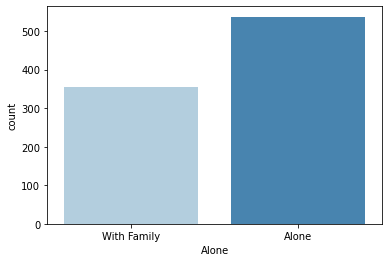

In [44]:
#There were more alone passengers than passengers with family.
sns.countplot('Alone',data=titanic_df,palette='Blues')

In [ ]:
#There were more dead passengers than survivors

titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.countplot('Survivor',data=titanic_df,palette='Set1')

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


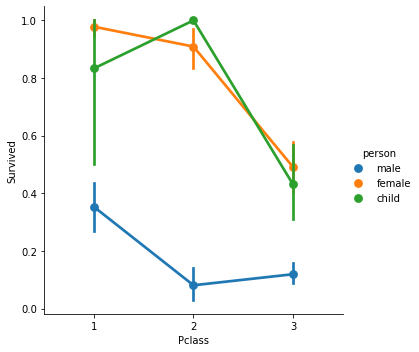

In [36]:
#Thirdclass survival rates is substantially lower
#Was this a cause of "women and children first"?
#Well, 3rd class had way more males. 
#Must consider class and gender.
#Being a male, and especially lower class would not be good.
sns.factorplot('Pclass','Survived',data=titanic_df, hue='person')

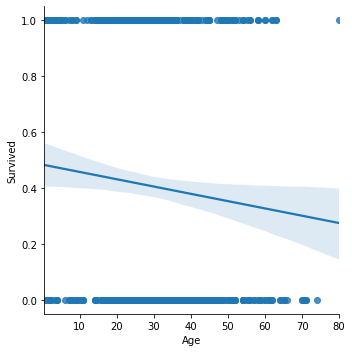

In [38]:
#Ones are people who survive
#Zeroes did not survive
#Older passengers were less likely to survive
sns.lmplot('Age','Survived', data=titanic_df)

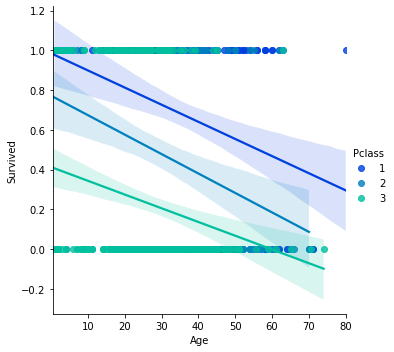

In [41]:
#Let's add class to the graph.
sns.lmplot('Age','Survived', data=titanic_df, hue='Pclass', palette='winter')

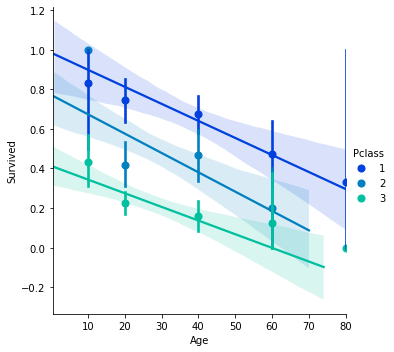

In [42]:
#Make age bins.
#Find SDeviation
#There's a high SDv for elderly in the 1st class

generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

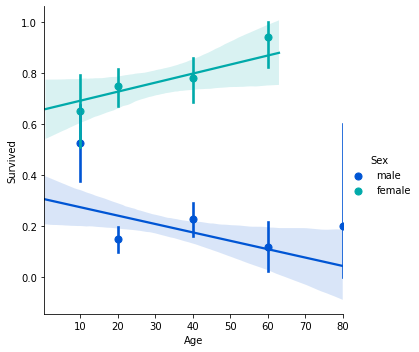

In [43]:
#Older females have a better chance of survival than older males.
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

In [ ]:
#Did the deck have an effect on the passenger survival rate?
#Did having a family member increase the odds of surviving?